Import Dependencies(Libraries) in python

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

Importing Boston House Price dataset


In [20]:
house_datasets= sklearn.datasets.fetch_california_housing()

In [21]:
print(house_datasets)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

To display only columns of the dataframe , we use".data".


In [9]:
# Loading the dataset to a pandas datafram
# house_datasets_dataframe=pd.DataFrame(house_datasets.data)


To display the datasets with columns names of the dataframe ,we use "feature_names"

In [22]:
house_datasets_dataframe=pd.DataFrame(house_datasets.data, columns=house_datasets.feature_names)

To display the first 5 rows, ".head()" is used.!!!

In [23]:
house_datasets_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Add the Target coulmns into the dataframe

In [24]:
house_datasets_dataframe['Price']=house_datasets.target

In [25]:
house_datasets_dataframe.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Checing no. of columns and rows we have in the dataframe


In [26]:
house_datasets_dataframe.shape

(20640, 9)

Check for missing values in the dataframes,

In [27]:
house_datasets_dataframe.isnull().sum()
# isnull(): used to check the null values in the dataframes(or we say in metrics).
# sum(): used to count the total number of null values in the dataframes.

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

Statistical measures of the datasets
(mean, st.deviation,etc..)

In [28]:
house_datasets_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the datasets

1.Positive Correlation

2.Negative Correlation

Correlation: Its basically represents the relation between two variables(or features).

The Funciton we used: ".corr()" on the dataframe

In [29]:
correlation=house_datasets_dataframe.corr()

<Axes: >

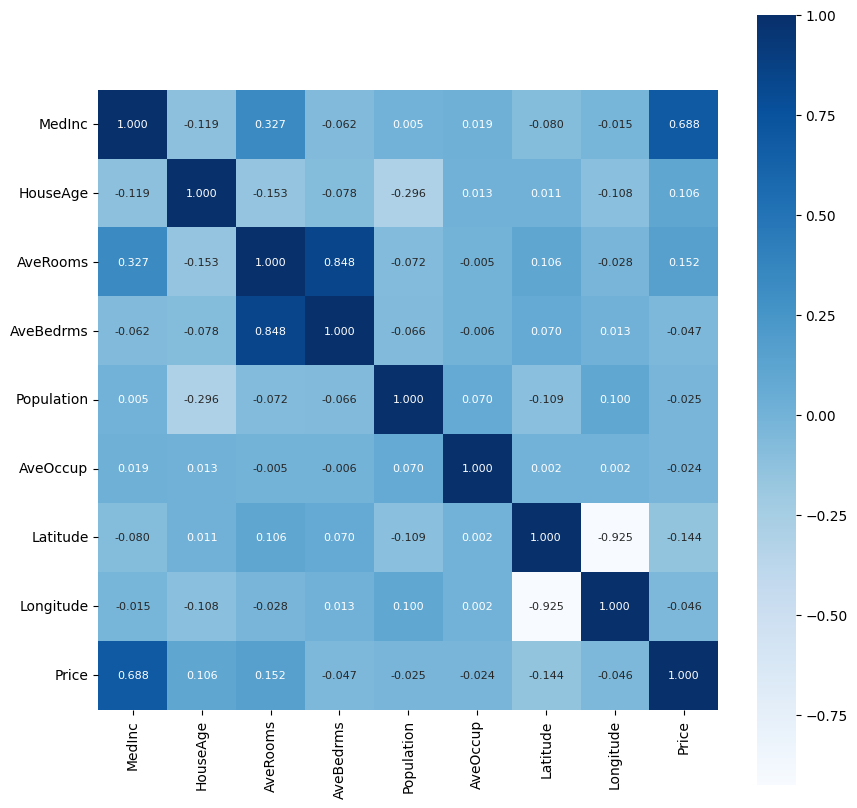

In [30]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True,fmt='.3f', annot=True,annot_kws={'size':8}, cmap='Blues')
# cbar: Colour barr (that vertical bar in the right hand side), its shows the correlation b/w the variables(features).
# Square: we want the values to be in squares\
# fmt: no. of digits we wants after decimal
# annot(annotation): used to shows the features in the map
# annot_kws : To specify the font size(or we can say annotation size)
# cmap: colour of map


Spliting the data and Target(lable)

droping --> row: axis=0, columns=1

In [31]:
X=house_datasets_dataframe.drop(['Price'],axis=1)
y=house_datasets_dataframe['Price']
print(X)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into Training Data and Test Data

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=2)
# test size=0.2 represents to take 20% of the datasets for testing and others for training
# random_state: It ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.

In [33]:
print(X.shape,X_train.shape,X_test.shape)


(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor Model; its the types of decision tree algorithm.

In [34]:
# Loading the model
model=XGBRegressor()

In [35]:
# training the model with X_trian
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

Prediction on trainig data

In [36]:
# tryinhg to get the accuracy on training data
training_data_pridiction= model.predict(X_train)


In [37]:
print(training_data_pridiction)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


comparing the prediction of X_train  with y_trian


In [38]:
# R Square error
score_1= metrics.r2_score(y_train,training_data_pridiction)

# mean absolute Error
score_2=metrics.mean_absolute_error(y_train,training_data_pridiction)

print("R Square error:", score_1)
print("mean absolute Error:",score_2)

R Square error: 0.9451221492760822
mean absolute Error: 0.1919170860794262


Visualizing the actual Prices and predicted prices

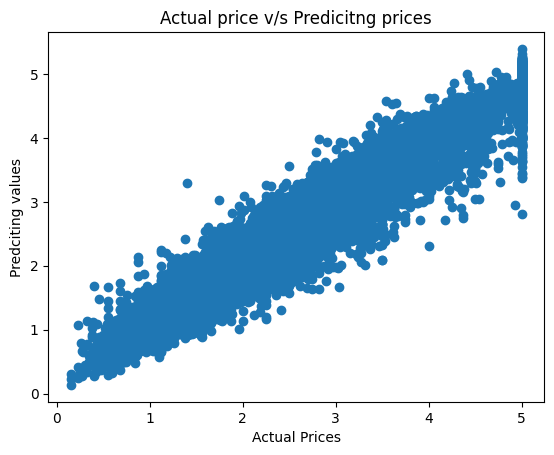

In [39]:
plt.scatter(y_train,training_data_pridiction)
plt.xlabel("Actual Prices")
plt.ylabel("Predciting values")
plt.title("Actual price v/s Predicitng prices")
plt.show()

Prediction on test data

In [40]:
# tryinhg to get the accuracy on training data
testing_data_pridiction= model.predict(X_test)


Calculating the error in Testing datasets

In [41]:
# R Square error
score_3= metrics.r2_score(y_test,testing_data_pridiction)

# mean absolute Error
score_4=metrics.mean_absolute_error(y_test,testing_data_pridiction)

print("R Square error:", score_3)
print("mean absolute Error:",score_4)

R Square error: 0.8412904408180302
mean absolute Error: 0.30753655785801337


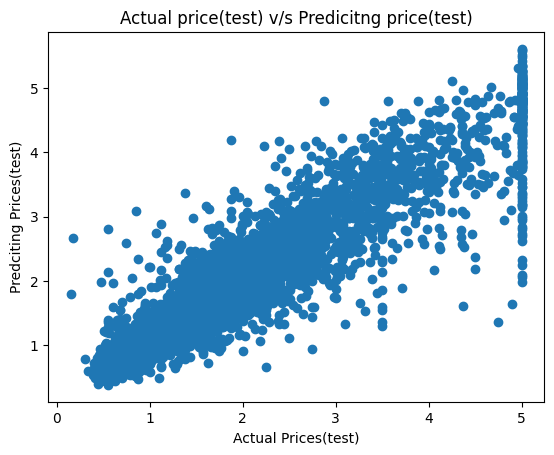

In [42]:
plt.scatter(y_test,testing_data_pridiction)
plt.xlabel("Actual Prices(test)")
plt.ylabel("Predciting Prices(test)")
plt.title("Actual price(test) v/s Predicitng price(test)")
plt.show()